# 10. Inequalities and limit theorems

## Brief summary

### Inequalities

#### Cauchy-Schwarz

For any r.v.s $X$ and $Y$ with finite variances,

\begin{equation}
|E(XY)| \leq \sqrt{E(X^2)E(Y^2)}.
\end{equation}

#### Jensen

Let $X$ be a random variable. If $g$ is a convex function, then $E(g(X)) \geq g(E(X))$. If $g$ is a concave function, then $E(g(X)) \leq g(E(X))$. In both cases, the only way that equality can hold is if there are constants $a$ and $b$ such that $g(X) = a + bX$ with probability $1$.

#### Markov

For any r.v. $X$ and constant $a > 0$,

\begin{equation}
P(|X| \geq a) \leq \frac{E|X|} {a}.
\end{equation}

#### Chebyshev

Let $X$ have mean $\mu$ and variance $\sigma^2$. Then for any $a > 0$,

\begin{equation}
P(|X-\mu| \geq a) \leq \frac{\sigma^2} {a^2}.
\end{equation}

#### Chernoff

For any r.v. $X$ and constants $a > 0$ and $t > 0$,

\begin{equation}
P(X \geq a) \leq \frac{E(e^{tX})} {e^{ta}}.
\end{equation}

- The right-hand side can be optimized over $t$ to give the tightest upper bound.
- If the MGF of $X$ exists, then the numerator in the bound is the MGF, and some of the useful properties of MGFs can come into play.


### Law of large numbers

#### Strong law of large numbers

The sample mean $\bar{X}_n$ converges to the true mean $\mu$ pointwise as $n \to \infty$, with probability $1$. In other words, the event $\bar{X}_n \to \mu$ has probability $1$.

#### Weak law of large numbers

For all $\epsilon > 0$, $P(|\bar{X}_n-\mu| > \epsilon) \to 0$ as $n \to \infty$. (This form of convergence is called *convergence in probability*).


### Central limit theorem

As $n \to \infty$, 

\begin{equation}
\sqrt{n}\big(\frac{\bar{X}_n-\mu}{\sigma}\big) \to \mathcal{N}(0, 1)\ \text{in distribution}.
\end{equation}

In words, the CDF of the left-hand side approaches $\Phi$, the CDF of the standard Normal distribution.

#### Central limit theorem, approximation form

For large $n$, the distribution of $\bar{X}_n$ is approximately $\mathcal{N}(\mu, \sigma^2/n)$.


### Chi-Square distribution

Let $V = Z_1^2 + ... + Z_n^2$ where $Z_1, Z_2, ..., Z_n$ are i.i.d. $\mathcal{N}(0,1)$. Then $V$ is said to have the *Chi-Square distribution with $n$ degrees of freedom*. We write this as $V \sim \chi_n^2.$

The $\chi_n^2$ distribution is the $Gamma(\frac{n}{2}, \frac{1}{2})$ distribution.

#### Distribution of sample variance

For i.i.d. $X_1, ..., X_n \sim \mathcal{N}(\mu, \sigma^2)$, the sample variance is the r.v.

\begin{equation}
S_n^2 = \frac{1}{n-1} \sum_{j=1}^n (X_j - \bar{X}_n)^2,
\end{equation}

and

\begin{equation}
\frac{(n-1)S_n^2}{\sigma^2} \sim \chi_{n-1}^2.
\end{equation}


### Student-*t* distribution

Let 

\begin{equation}
T = \frac{Z} {\sqrt{V/n}},
\end{equation}

where $Z \sim \mathcal{N}(0, 1), V \sim \chi_n^2$, and $Z$ is independent of $V$. Then $T$ is said to have the *Student-*t* distribution with $n$ degrees of freedom*. We write this as $T \sim t_n$. Often "Student-*t* distribution" is abbreviated to "*t* distribution".

#### Student-*t* properties

The Student-*t* distribution has the following properties.

1. Symmetry: If $T \sim t_n$, then $-T \sim t_n$ as well.
2. Cauchy as special case: The $t_1$ distribution is the same as the Cauchy distribution.
3. Convergence to Normal: As $n \to \infty$, the $t_n$ distribution approaches the standard Normal distribution.


## Python examples



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, binom, uniform, chi2, t, norm
from numpy.random import choice

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Jensen's inequality

$E(logX) \leq logEX$

In [2]:
# Simulate 10^4 times from the Expo(1) distribution:
X = expon.rvs(size=10**4)
print(np.mean(np.log(X)))    # LHS
print(np.log(np.mean(X)))    # RHS

-0.593852855096
-0.0129976299479


### Visualization of the law of large numbers

In [3]:
# Generate the coin tosses:
nsim = 300
p = 1/2.
X = binom.rvs(1, p, size=nsim)

In [4]:
# Compute \bar{X}_n for each value n and store the results in Xbar
Xbar = np.cumsum(X) / np.arange(1, nsim+1, dtype=np.float)

(0.0, 1.0)

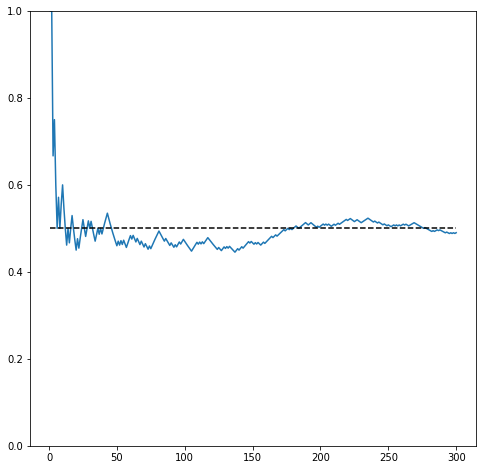

In [5]:
# Plot Xbar against the number of coin tosses
plt.figure(figsize=(8, 8))
_ = plt.plot(np.arange(1, nsim+1), Xbar)
plt.plot(np.arange(1, nsim+1), [0.5]*nsim, 'k--')
plt.ylim(0.0, 1.0)

### Monte Carlo estimate of $\pi$

In [6]:
# To generate Uniform points on the 2D square, 
# we can independently generate the x-coordinate and the y-coordinate
# as Unif(-1, 1) r.v.s
nsim = 10**6
X = uniform.rvs(loc=-1.0, scale=2.0, size=nsim)
Y = uniform.rvs(loc=-1.0, scale=2.0, size=nsim)

In [7]:
# Count the number of points in the disk
print(4* np.sum(X**2 + Y**2 < 1) / float(nsim))

3.138172


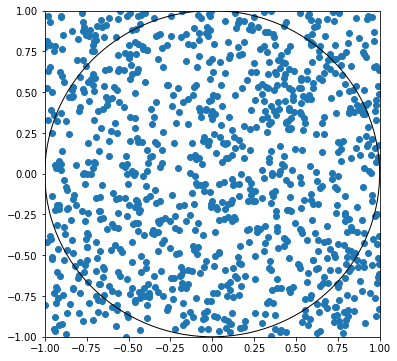

In [8]:
# Plot sample points
circle = plt.Circle((0, 0), 1, color='k', fill=False)

plt.figure(figsize=(6, 6))
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)

sample_idxs = np.random.choice(X.shape[0], size=1000)
X_sample, Y_sample = X[sample_idxs], Y[sample_idxs]
ax.scatter(X_sample, Y_sample, marker='o')

### Visualizations of the central limit theorem

In [9]:
nsim = 10**4
n = 12
# Create a matrix of i.i.d. standard Uniforms
# which has 12 columns, corresponding to X_1 through X_12
# and each row is a different realization of X_1 through X_12
X = uniform.rvs(size=nsim*n).reshape((nsim, n))

In [10]:
# To obtain realizations of \bar{X}, simply take the average of each row
Xbar = np.mean(X, axis=1)

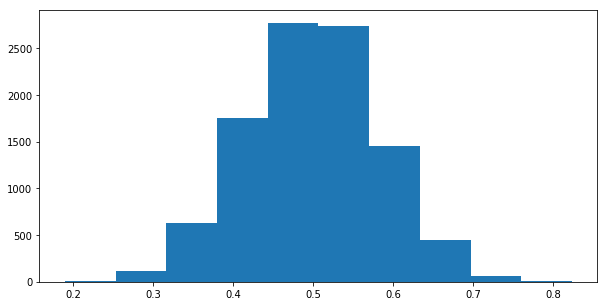

In [11]:
# Create a histogram
plt.figure(figsize=(10, 5))
_ = plt.hist(Xbar)

### Chi-Square and Student-*t* distributions

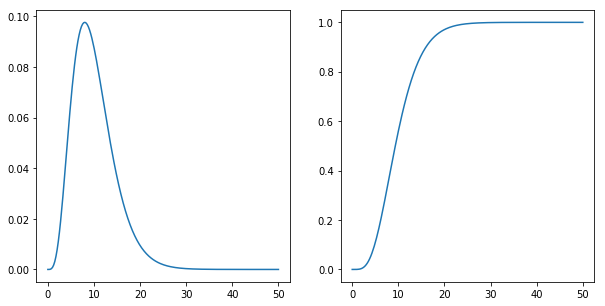

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
X = np.linspace(0, 50, 200)
n = 10
axes[0].plot(X, chi2.pdf(X, df=n))
axes[1].plot(X, chi2.cdf(X, df=n))

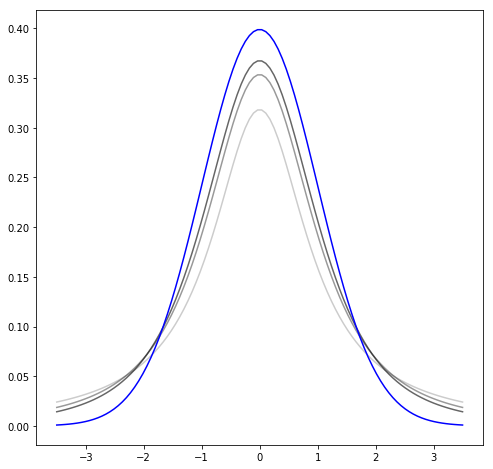

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
X = np.linspace(-3.5, 3.5, 100)
n = [1, 2, 3, 5, 10]
alpha = np.linspace(0.2, 1.0, 5)
ax.plot(X, t.pdf(X, df=n[0]), color='k', alpha=alpha[0])
ax.plot(X, t.pdf(X, df=n[1]), color='k', alpha=alpha[1])
ax.plot(X, t.pdf(X, df=n[2]), color='k', alpha=alpha[2])
ax.plot(X, norm.pdf(X), color='b')